# Ultrasound imaging
Using the delay-and-sum beamforming algorithm (sparse matrix-multiplication version).

Note: because `stride` simulations are relatively time-consuming, the following notebook uses data simulated by the MATLAB Ultrasound Toolbox dataset.
It then checks against the MUST results.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io

from neurotechdevkit.imaging import beamform, demodulate

In [2]:
must_data = scipy.io.loadmat('/Users/charles/Downloads/MUST_example.mat')
print(must_data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'IQb', 'param', 'dels', 'xs', 'zs', 'BSC', 'RF', 'IQ', 'th', 'r', 'x', 'z'])


In [3]:
# Demodulate IQ signals to RF signals
iq_signals, _ = demodulate.demodulate_rf_to_iq(
    must_data["RF"],
    must_data["param"]["fs"].item().item(),
    freq_carrier=must_data["param"]["fc"].item().item(),
    bandwidth=must_data["param"]["bandwidth"].item().item() / 100,  # Convert % to fraction
)
iq_signals.shape

(1534, 64)

In [4]:
# Check that the demodulated signals match the MUST results
np.testing.assert_allclose(
    iq_signals,
    must_data["IQ"],
    rtol=1e-3,
    atol=1e-3,
)

In [5]:
# Beamform the IQ signals
iq_signals_beamformed = beamform.beamform_delay_and_sum(
    iq_signals,
    x=must_data["x"],
    z=must_data["z"],
    pitch=must_data["param"]["pitch"].item().item(),
    tx_delays=must_data["dels"].squeeze(),
    fs=must_data["param"]["fs"].item().item(),
    fc=must_data["param"]["fc"].item().item(),
    f_number=None,
    width=must_data["param"]["width"].item().item(),
    bandwidth=must_data["param"]["bandwidth"].item().item() / 100,  # Convert % to fraction
)
iq_signals_beamformed.shape

(256, 128)

In [6]:
# Note: The MUST example uses linear interpolation, which we have not yet implemented. Instead, we use nearest-neighbor interpolation.

/var/folders/08/dv9xlvl56gl25rl3kk3wms140000gp/T/ipykernel_11460/4199682112.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(


Text(0, 0.5, '[m]')

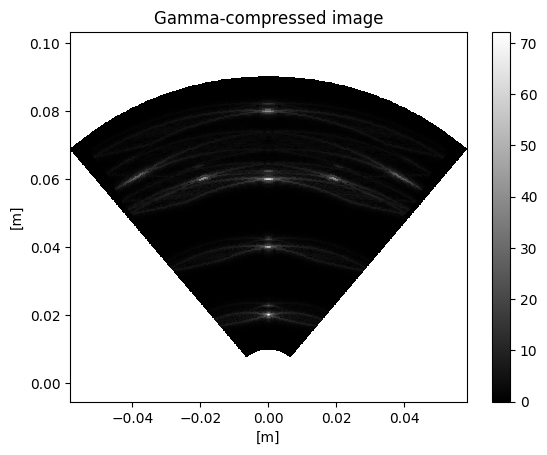

In [7]:
# Plot the beamformed IQ signals
plt.pcolormesh(
    must_data["x"],
    must_data["z"],
    np.abs(iq_signals_beamformed)**0.5,
    cmap='gray'
)
plt.colorbar()
plt.axis('equal')
plt.title('Gamma-compressed image')
plt.xlabel('[m]')
plt.ylabel('[m]')